In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.modeling.train_sentiment import train_and_evaluate_sentiment

In [4]:
sns.set(style="whitegrid")

## Training & evaluation

In [5]:
# Step 1: Execute model training and evaluation
train_and_evaluate_sentiment()
print("Sentiment model pipeline executed.")

Epoch 1/30
836/836 - 76s - loss: 0.9078 - accuracy: 0.4374 - val_loss: 0.8397 - val_accuracy: 0.5186 - lr: 0.0010 - 76s/epoch - 91ms/step
Epoch 2/30
836/836 - 75s - loss: 1.0287 - accuracy: 0.4308 - val_loss: 0.9839 - val_accuracy: 0.4127 - lr: 0.0010 - 75s/epoch - 90ms/step
Epoch 3/30
836/836 - 75s - loss: 0.7768 - accuracy: 0.5429 - val_loss: 0.8138 - val_accuracy: 0.5751 - lr: 0.0010 - 75s/epoch - 90ms/step
Epoch 4/30
836/836 - 81s - loss: 0.5432 - accuracy: 0.6837 - val_loss: 0.6578 - val_accuracy: 0.7021 - lr: 0.0010 - 81s/epoch - 97ms/step
Epoch 5/30
836/836 - 79s - loss: 0.4241 - accuracy: 0.7718 - val_loss: 0.5389 - val_accuracy: 0.7875 - lr: 0.0010 - 79s/epoch - 94ms/step
Epoch 6/30
836/836 - 81s - loss: 0.3163 - accuracy: 0.8445 - val_loss: 0.5015 - val_accuracy: 0.8092 - lr: 0.0010 - 81s/epoch - 97ms/step
Epoch 7/30
836/836 - 166s - loss: 0.2370 - accuracy: 0.8883 - val_loss: 0.4703 - val_accuracy: 0.8350 - lr: 0.0010 - 166s/epoch - 199ms/step
Epoch 8/30
836/836 - 79s - loss

In [6]:
# Load metrics report
import json
with open("../outputs/sentiment_accuracy.txt", "r") as f:
    report = json.load(f)

In [7]:
# Convert classification report to DataFrame
report_df = pd.DataFrame(report).T
report_df = report_df.round(3)
display(report_df)

,precision,recall,f1-score,support
negative,0.734,0.830,0.779,2001.000
neutral,0.913,0.830,0.869,8805.000
positive,0.707,0.858,0.775,2556.000
accuracy,0.835,0.835,0.835,0.835
macro avg,0.785,0.839,0.808,13362.000
weighted avg,0.847,0.835,0.838,13362.000


<Figure size 1000x400 with 0 Axes>

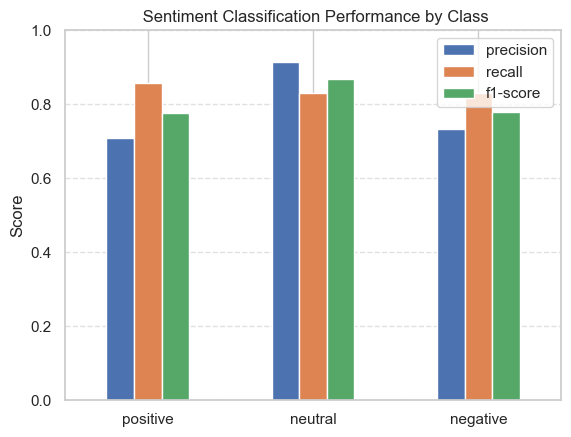

In [8]:
#  Visualize key performance metrics
plt.figure(figsize=(10, 4))
report_df.loc[["positive", "neutral", "negative"], ["precision", "recall", "f1-score"]].plot(kind="bar")
plt.title(" Sentiment Classification Performance by Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [9]:
#  Sample predictions
pred_df = pd.read_csv("../outputs/predictions_sentiment.csv")
display(pred_df.sample(20))

,true_sentiment,predicted_sentiment
11739,neutral,neutral
8740,neutral,neutral
9218,neutral,neutral
9088,neutral,neutral
8296,neutral,neutral
9959,positive,neutral
6610,neutral,neutral
11333,positive,positive
2101,positive,positive
2122,neutral,neutral
